<a href="https://colab.research.google.com/github/Antoneva98/portfolio/blob/main/Global_Sales_Analytics_Data_Cleaning%2C_Insights_%26_Business_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Connecting Google Drive
* Download data for analysis with using lib Pandas.   

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Example of changing work folder
%cd /content/drive/MyDrive/colab_projects/Final\ project

/content/drive/MyDrive/colab_projects/Final project


In [ ]:
# import CSV file
df_countries = pd.read_csv("countries.csv")

##Data overview and Descriptive Statistics
I decided to combine these stages to keep the statistics and overview of each table in one block for visual convenience
Stages:
* Converting spelling to a single style
* Preview the first few rows of data to understand the table structure, number of variables (columns), and data format.
* Calculate basic statistics such as mean, median, mode, minimum and maximum values, etc.
* Check the distribution of data for different variables, which allows you to see how often certain values occur.
* Search for and identify missing values and duplicates. Eliminate them.
* Search and detect data anomalies. Eliminate them.
* Join tables for further analysis and work.

In [ ]:
#changing colomn name to snake_case
df_countries = df_countries.rename(columns=
                                   {"alpha-2": "alpha_2",
                                    "alpha-3": "alpha_3",
                                    "sub-region": "sub_region"})


In [ ]:
df_countries.head(-5)

,name,alpha_2,alpha_3,region,sub_region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
...,...,...,...,...,...
239,Vanuatu,VU,VUT,Oceania,Melanesia
240,Venezuela (Bolivarian Republic of),VE,VEN,Americas,Latin America and the Caribbean
241,Viet Nam,VN,VNM,Asia,South-eastern Asia
242,Virgin Islands (British),VG,VGB,Americas,Latin America and the Caribbean


In [ ]:
print(df_countries.shape)

(249, 5)


In [ ]:
#Data info
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha_2     248 non-null    object
 2   alpha_3     249 non-null    object
 3   region      248 non-null    object
 4   sub_region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
#Data types
df_countries.dtypes

,0
name,object
alpha_2,object
alpha_3,object
region,object
sub_region,object


In [ ]:
#Data description
df_countries.describe()

,name,alpha_2,alpha_3,region,sub_region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
#searh for missing values
print(df_countries.isna().sum())

name          0
alpha_2       1
alpha_3       0
region        1
sub_region    1
dtype: int64


In [ ]:
#percentage for missing values
print(df_countries.isna().sum() / df_countries.shape[0]*100)

name             0.403226
alpha_2          0.403226
alpha_3          0.000000
region           0.000000
sub_region       0.000000
country_name    99.596774
dtype: float64


In [ ]:
#delet missing values
#The number of blank cells do not affect data analysis
df_countries = df_countries[df_countries["alpha_2"].notna()]
df_countries = df_countries[df_countries["region"].notna()]
df_countries = df_countries[df_countries["sub_region"].notna()]

In [ ]:
#cleaning duplicate
duplicate_rows = df_countries.duplicated()
print(duplicate_rows.sum())

0


In [ ]:
#import CSV file
df_events = pd.read_csv("events.csv")

In [ ]:
df_events.columns = df_events.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
df_events.head(-5)

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79
...,...,...,...,...,...,...,...,...,...,...
1320,990774810,1/17/2014,2/18/2014,C,NLD,7940,Offline,1138.0,668.27,502.54
1321,991761863,12/20/2011,12/24/2011,M,NOR,4594,Offline,3229.0,9.33,6.92
1322,992992675,3/8/2011,3/9/2011,M,SRB,5988,Offline,7454.0,154.06,90.93
1323,993368613,2/8/2016,2/16/2016,H,DEU,3127,Offline,8702.0,81.73,56.67


In [ ]:
#change values "online" to "Online"
df_events["sales_channel"] = df_events["sales_channel"].replace("online", "Online")

In [ ]:
#Data overview
print(df_events.shape)

(1330, 10)


In [ ]:
#Data info
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
#Data types
df_events.dtypes

,0
order_id,int64
order_date,object
ship_date,object
order_priority,object
country_code,object
product_id,int64
sales_channel,object
units_sold,float64
unit_price,float64
unit_cost,float64


In [ ]:
#change date types
df_events["order_date"] = pd.to_datetime(df_events["order_date"])
df_events["ship_date"] = pd.to_datetime(df_events["ship_date"])

In [ ]:
#Data describtion
df_events.describe()

,order_id,order_date,ship_date,product_id,units_sold,unit_price,unit_cost
count,1.330000e+03,1330,1330,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.201807,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2905.198996,217.323460,176.158873


In [ ]:
#searh for missing values
print(df_events.isna().sum())

order_id           0
order_date         0
ship_date          0
order_priority     0
country_code      82
product_id         0
sales_channel      0
units_sold         2
unit_price         0
unit_cost          0
dtype: int64


In [ ]:
#search for missing values
print(df_events.isna().sum() / df_events.shape[0] * 100)

order_id          0.000000
order_date        0.000000
ship_date         0.000000
order_priority    0.000000
country_code      6.165414
product_id        0.000000
sales_channel     0.000000
units_sold        0.150376
unit_price        0.000000
unit_cost         0.000000
dtype: float64


In [ ]:
#working with missing values
#replace empty values with "Unknown", because the code is not a critical value for this analysis
df_events = df_events[df_events["units_sold"].notna()]
df_events["country_code"] = df_events["country_code"].fillna("Unknown")

<ipython-input-280-c0c294b2c8e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events["country_code"] = df_events["country_code"].fillna("Unknown")


In [ ]:
duplicate_rows_2 = df_events.duplicated()
print(duplicate_rows_2.sum())

0


In [ ]:
# import CSV file
df_products = pd.read_csv("products.csv")

In [ ]:
#rename column`s name
df_products = df_products.rename(columns=
                                 {
                                     "id": "product_id"
                                 })

In [ ]:
df_products.head(10)

,product_id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


In [ ]:
#Data overview
print(df_products.shape)

(12, 2)


In [ ]:
#Data info
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  12 non-null     int64 
 1   item_type   12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
#Data types
df_products.dtypes

,0
product_id,int64
item_type,object


In [ ]:
#Data description
df_products.describe()

,product_id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


In [ ]:
#search for missing values
print(df_products.isna().sum() / df_products.shape[0] * 100)

product_id    0.0
item_type     0.0
dtype: float64


In [ ]:
#delet duplicate rows
duplicated_rows = df_products.duplicated()
print(duplicated_rows.sum())

0


In [ ]:
#joining columns df_events + df_countries
df_merged = df_events.merge(df_countries, left_on='country_code', right_on='alpha_3', how='left')

#joining with df_products
df_merged = df_merged.merge(df_products, on='product_id', how='left')

In [ ]:
#delet unnecessary columns
df_merged.rename(columns = {"name": "country_name"}, inplace = True)

df_cleaned = df_merged.drop(columns=["alpha_2", "alpha_3", "product_id"])


In [ ]:
 #3.2 revenue and profit
 df_cleaned["revenue"] = df_cleaned["units_sold"] * df_cleaned["unit_price"]
 df_cleaned["profit"] = df_cleaned["units_sold"] * (df_cleaned["unit_price"] - df_cleaned["unit_cost"])
 df_cleaned["cost"] = df_cleaned["units_sold"] * df_cleaned["unit_cost"]
 df_cleaned["delivery_days"] = (df_cleaned["ship_date"] - df_cleaned["order_date"]).dt.days

In [ ]:
df_cleaned.head(-5)

,order_id,order_date,ship_date,order_priority,country_code,sales_channel,units_sold,unit_price,unit_cost,country_name,region,sub_region,item_type,revenue,profit,cost,delivery_days
0,100640618,2014-10-08,2014-10-18,M,NOR,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,57583.50,76121.50,10
1,100983083,2016-08-11,2016-08-11,C,SRB,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,176559.87,233400.23,0
2,101025998,2014-07-18,2014-08-11,M,Unknown,Online,4693.0,668.27,502.54,NaN,NaN,NaN,Household,3136191.11,777770.89,2358420.22,24
3,102230632,2017-05-13,2017-06-13,L,MNE,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,85998.24,41968.64,31
4,103435266,2012-08-11,2012-09-18,H,SRB,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,119767.68,243129.92,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,990774810,2014-01-17,2014-02-18,C,NLD,Offline,1138.0,668.27,502.54,Netherlands,Europe,Western Europe,Household,760491.26,188600.74,571890.52,32
1319,991761863,2011-12-20,2011-12-24,M,NOR,Offline,3229.0,9.33,6.92,Norway,Europe,Northern Europe,Fruits,30126.57,7781.89,22344.68,4
1320,992992675,2011-03-08,2011-03-09,M,SRB,Offline,7454.0,154.06,90.93,Serbia,Europe,Southern Europe,Vegetables,1148363.24,470571.02,677792.22,1
1321,993368613,2016-02-08,2016-02-16,H,DEU,Offline,8702.0,81.73,56.67,Germany,Europe,Western Europe,Personal Care,711214.46,218072.12,493142.34,8


In [ ]:
#searh for missing values
#when merging via left merge with df_countries, the rows with 'Unknown' did not find a match in the alpha_3 column
print(df_cleaned.isna().sum())

order_id           0
order_date         0
ship_date          0
order_priority     0
country_code       0
sales_channel      0
units_sold         0
unit_price         0
unit_cost          0
country_name      82
region            82
sub_region        82
item_type          0
revenue            0
profit             0
cost               0
delivery_days      0
dtype: int64


In [ ]:
print(df_merged[df_merged['country_name'].isna()][['country_code']].value_counts())

country_code
Unknown         82
Name: count, dtype: int64


In [ ]:
#create new country "Unknown"
new_country = pd.DataFrame([{
    'alpha_3': 'Unknown',
    'country_name': 'Unknown',
    'region': 'Other',
    'sub_region': 'Other'
}])

df_countries = pd.concat([df_countries, new_country], ignore_index=True)

In [ ]:
total_orders = len(df_cleaned)
total_profit = df_cleaned['profit'].sum()
total_revenue = df_cleaned['revenue'].sum()
total_units_sold = df_cleaned['units_sold'].sum()
unique_countries = df_cleaned['country_name'].nunique()
average_profit_per_order = total_profit / total_orders

#Revenue distribution by sales channels
revenue_by_channel = df_cleaned.groupby('sales_channel')['revenue'].sum().sort_values(ascending=False)

print(df_cleaned[["units_sold", "unit_price", "unit_cost", "revenue", "profit"]].head())

print("\nKey business metrics")
print(f"Total count uniq order: {total_orders}")
print(f"Total profit: ${total_profit:,.2f}")
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Total count unit sold: {total_units_sold}")
print(f"Count countries covered: {unique_countries}")
print(f"Average profit per order: ${average_profit_per_order:,.2f}")
print("\nRevenue by sales channel")
print(revenue_by_channel)

   units_sold  unit_price  unit_cost     revenue     profit
0       650.0      205.70     117.11   133705.00   57583.50
1      1993.0      205.70     117.11   409960.10  176559.87
2      4693.0      668.27     502.54  3136191.11  777770.89
3      1171.0      109.28      35.84   127966.88   85998.24
4      7648.0       47.45      31.79   362897.60  119767.68

Key business metrics
Total count uniq order: 1328
Total profit: $501,434,459.00
Total revenue: $1,702,129,408.21
Total count unit sold: 6576524.0
Count countries covered: 45
Average profit per order: $377,586.19

Revenue by sales channel
sales_channel
Offline    8.717606e+08
Online     8.303688e+08
Name: revenue, dtype: float64


##Data Analysis and Visualization
Data analysis, aggregation, and building pivot tables.

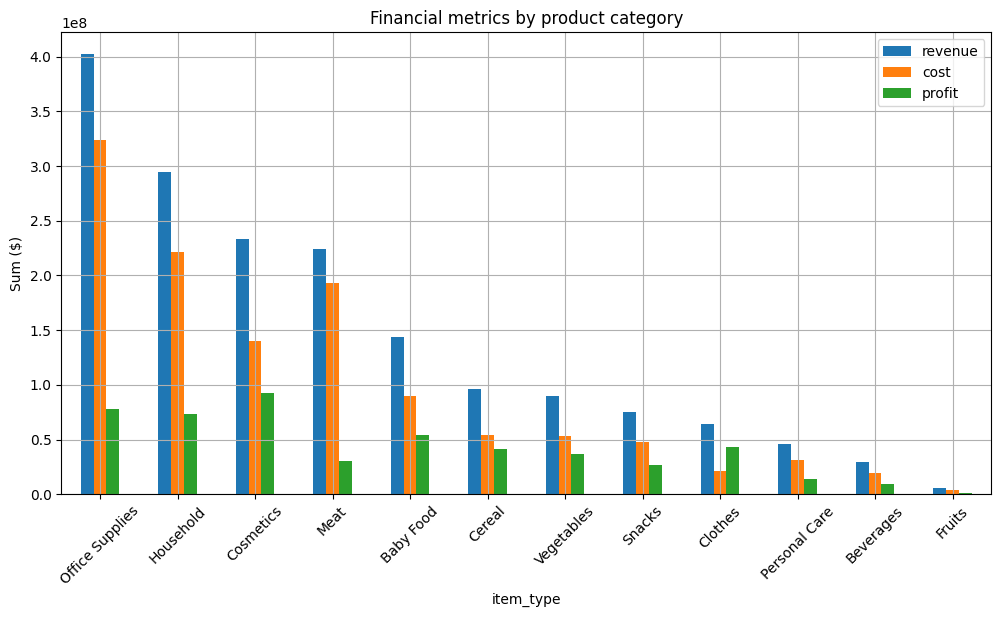

In [ ]:
#3.3 by category
category_metrics = df_cleaned.groupby("item_type").agg({
                                                        "revenue": "sum",
                                                        "cost": "sum",
                                                        "profit": "sum"}).sort_values("revenue", ascending=False)

category_metrics.plot(kind="bar", figsize=(12,6), title="Financial metrics by product category")
plt.ylabel("Sum ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The chart "*Financial metrics by product category*" displays the total revenue, cost, and profit for various product categories.

Key takeaways from the graph:

* "*Office Supplies*" and "*Household*" generate the highest revenue.
*  These same categories, "*Office Supplies*" and "*Household*" also show the largest profit, indicating strong profitability or high sales volumes.
* "*Fruits*" and "*Beverages*" show the lowest revenue and profit among the categories.



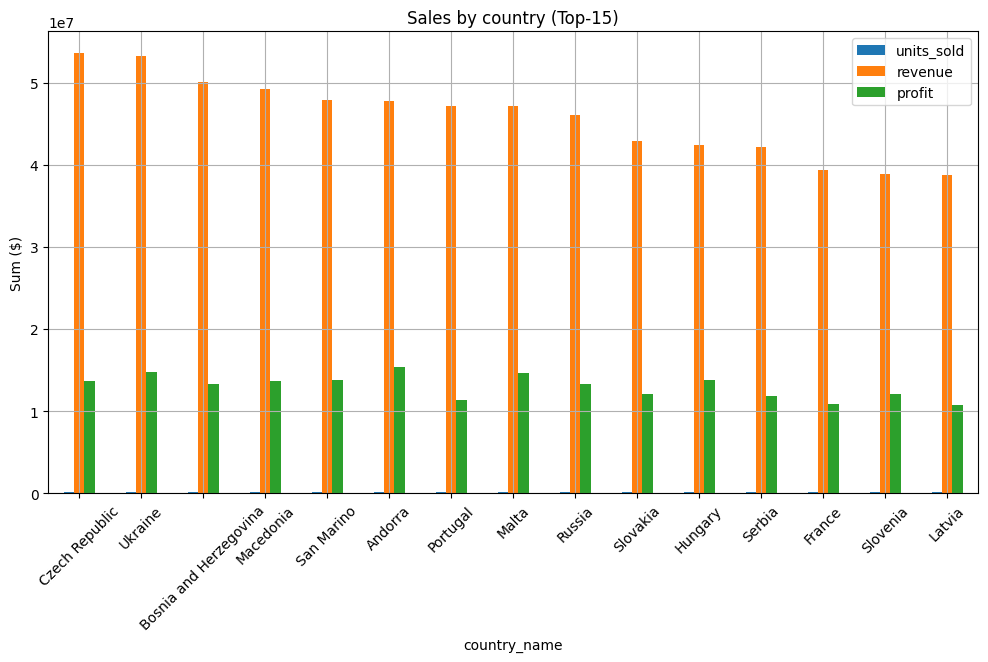

In [ ]:
#3.3 by countries
country_metrics = df_cleaned.groupby("country_name").agg({
    "units_sold": "sum",
    "revenue": "sum",
    "profit": "sum"
}).sort_values("revenue", ascending=False)

country_metrics.head(15).plot(kind="bar", figsize=(12,6), title="Sales by country (Top-15)")
plt.ylabel("Sum ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The chart "Sales by Country (Top-15)" presents the total units sold, revenue, and profit for the top 15 countries based on sales.

Key observations from the graph:

*  Czech Republic and Ukraine show the highest revenue.
*  Countries with higher revenue as usual to have higher profit.
*  Latvia have low revenue but a noticeable profit. This could indicate a focus on higher-margin products or efficient cost management.

*(Marg - is the difference between the cost of a product/service and the price at which it is sold.)*

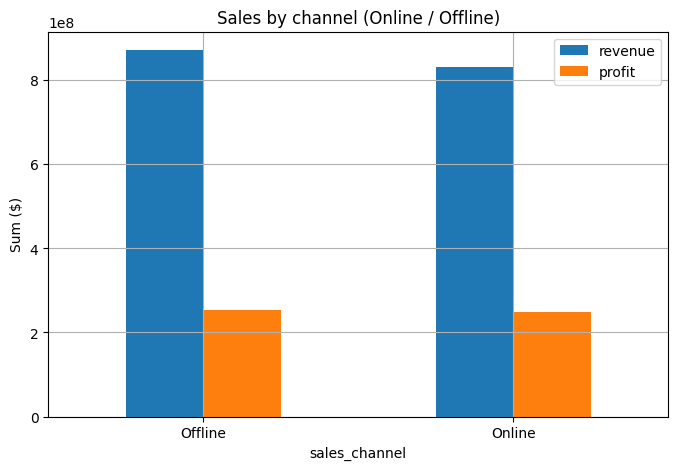

In [ ]:
#3.3 by channel
channel_metrics = df_cleaned.groupby("sales_channel").agg({

    "revenue": "sum",
    "profit": "sum"
})

channel_metrics.plot(kind="bar", figsize=(8,5), title="Sales by channel (Online / Offline)")
plt.ylabel("Sum ($)")
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

The chart "Sales by channel (Online / Offline)" compares the total revenue and profit generated through offline and online sales channels.

Key observations from the graph:

*  The Offline channel generates a little higher revenue than the Online channel.
*  The profit generated by both channels is very similar. The orange bars representing profit for both Offline and Online channels are almost the same height.
*  Both channels are profitable.

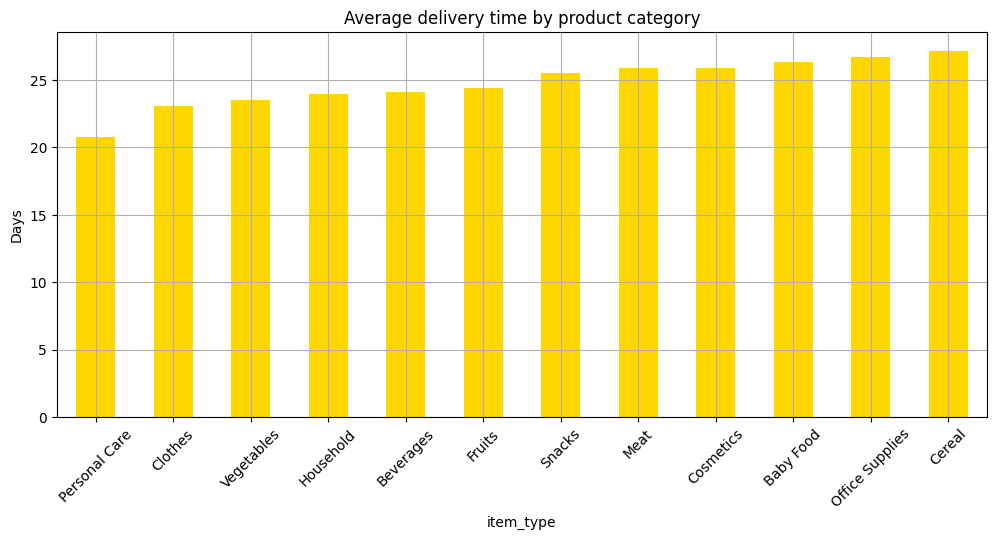

In [ ]:
#3.3 Average delivery time by product category
delivery_by_category = df_cleaned.groupby("item_type")["delivery_days"].mean().sort_values()

delivery_by_category.plot(kind="bar", figsize=(12,5), color="gold", title="Average delivery time by product category")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The chart "Average delivery time by product category" displays the mean delivery time in days for different item types.

Key observations from the graph:

*  "*Cereal*" has the longest average delivery time.
*  "*Personal Care*" has the shortest average delivery time.
*  Most product categories have a consistent average delivery time, which placed a relatively narrow range between ~ 23 and 27 days.
  

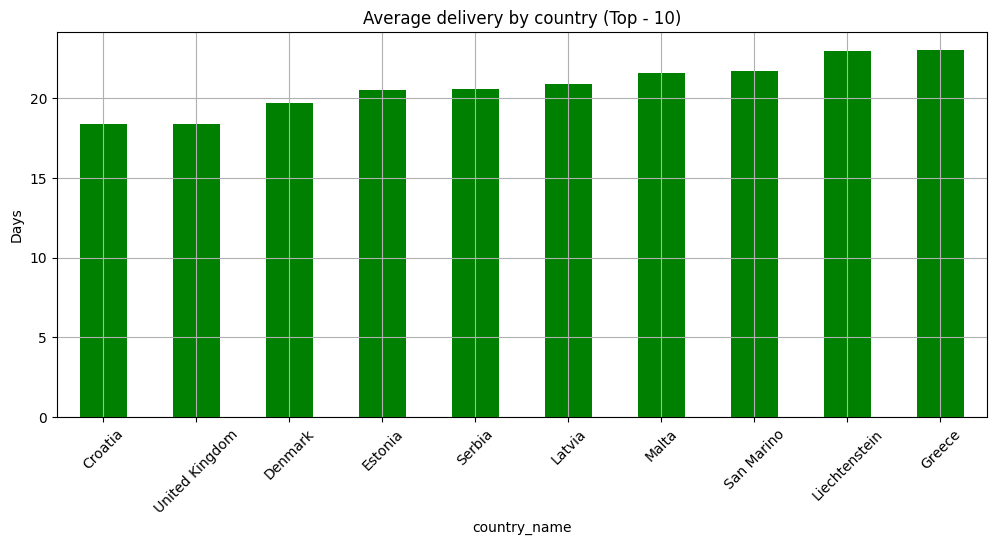

In [ ]:
#3.3  Average delivery by country
delivery_by_country = df_cleaned.groupby("country_name")["delivery_days"].mean().sort_values()

delivery_by_country.head(10).plot(kind="bar", figsize=(12,5), color="green", title="Average delivery by country (Top - 10)")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The chart "Average delivery by country (Top - 10)" displays the mean delivery time in days for the top 10 countries.

Key observations from the graph:

* Croatia has the shortest average delivery time.
* Greece shows the longest average delivery time.
* Data is sorted in ascending order.
* The difference in average delivery time between Croatia and Greece is noticeable, this is reflected in different logistics strategies or geographical factors.

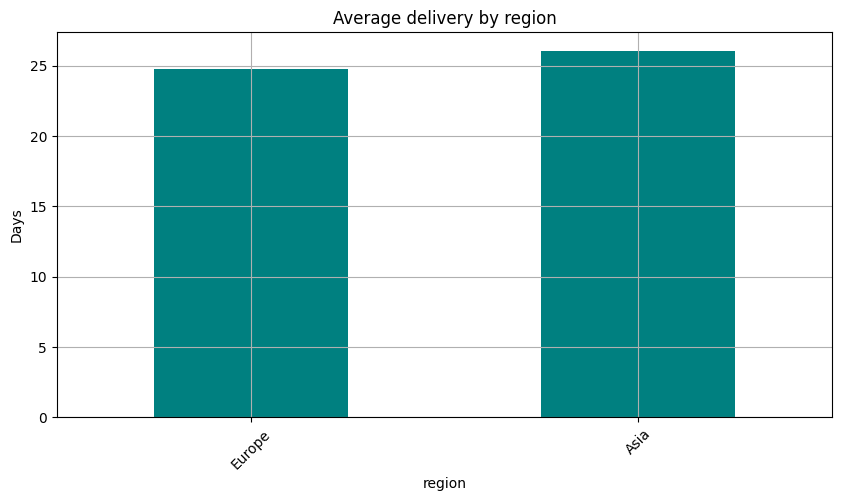

In [ ]:
#3.3 Average delivery by region
delivery_by_region = df_cleaned.groupby("region")["delivery_days"].mean().sort_values()

delivery_by_region.plot(kind="bar", figsize=(10,5), color="teal", title="Average delivery by region")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The chart "Average delivery by region" compares the mean delivery time in days for the regions of Europe and Asia.

Key observations from the graph:

* Asia has a little longer average delivery time compared to Europe.   
* The average delivery time for Europe is ~ 25 days.
* The average delivery time for Asia is ~ 26 days.

In [ ]:
#3.4 Analyze whether the profit depends on the time required to ship the goods
df_grouped = df_cleaned.groupby("delivery_days").agg({
    "profit": ['sum', 'mean', 'count']
}).reset_index()

df_grouped.columns = ['delivery_days', 'total_profit', 'average_profit', 'orders_count']

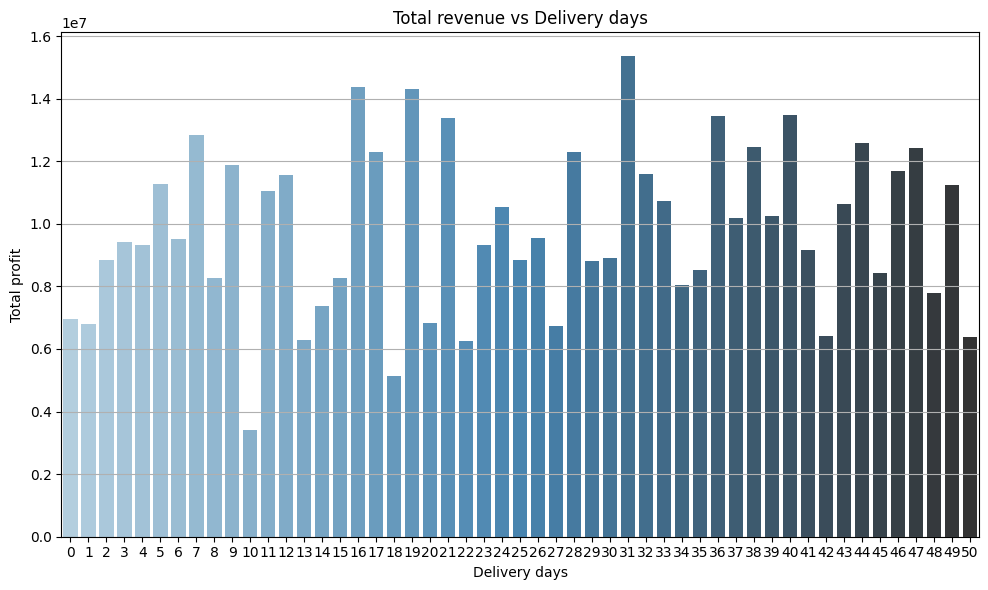

In [ ]:
#3.4
plt.figure(figsize=(10,  6))
sns.barplot(data=df_grouped, x="delivery_days", y="total_profit", hue="delivery_days", palette="Blues_d", legend=False)
plt.title('Total revenue vs Delivery days')
plt.xlabel('Delivery days')
plt.ylabel('Total profit')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The chart "Total revenue vs Delivery days" displays the total profit for different delivery durations in days.

Key observations from the graph:

* There isn't a clear linear relationship between the number of delivery days and the total revenue. Both shorter and longer delivery times can result in high or low total revenue.

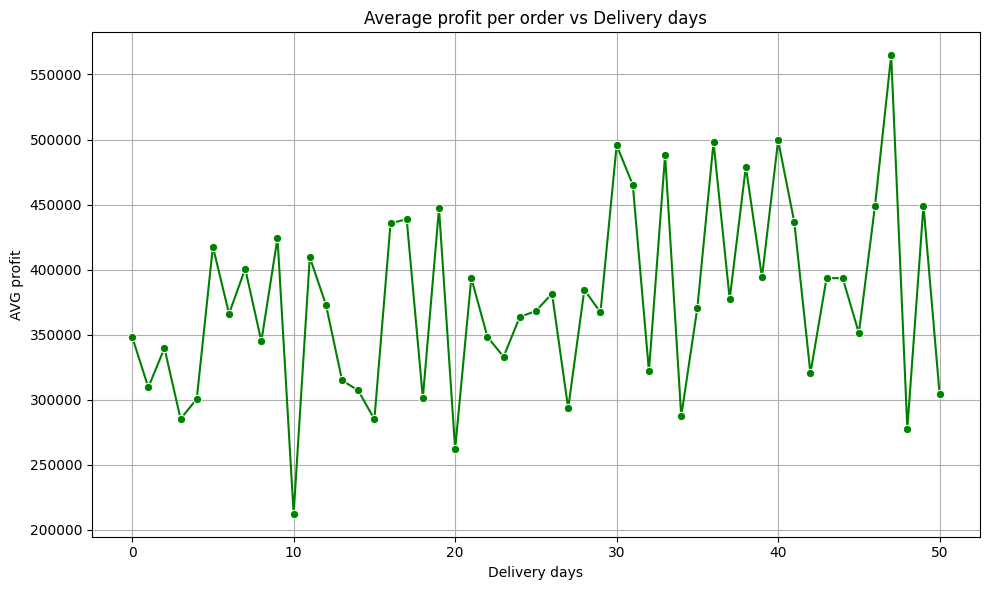

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='delivery_days', y='average_profit', marker='o', color='green')
plt.title('Average profit per order vs Delivery days')
plt.xlabel('Delivery days')
plt.ylabel('AVG profit')
plt.grid()
plt.tight_layout()
plt.show()

The line chart "Average profit per order vs Delivery days" displays how the average profit per order varies with the number of delivery days.

Key observations from the graph:


* No clear linear  relationship exists between delivery days and average profit per order. Longer delivery times don't consistently lead to higher or lower average profit, and the same is true for shorter delivery times.
* Peaks in average profit occur at different delivery durations. For example, there are high points around 18, 32, and 49 days, and low points around 11 and 22 days.
* Maybe we have other factors, beyond just the delivery time, which have a strong influence on the average profit per order.
* These factors could include the type of product ordered, some discounts, shipping costs or regional specifics.


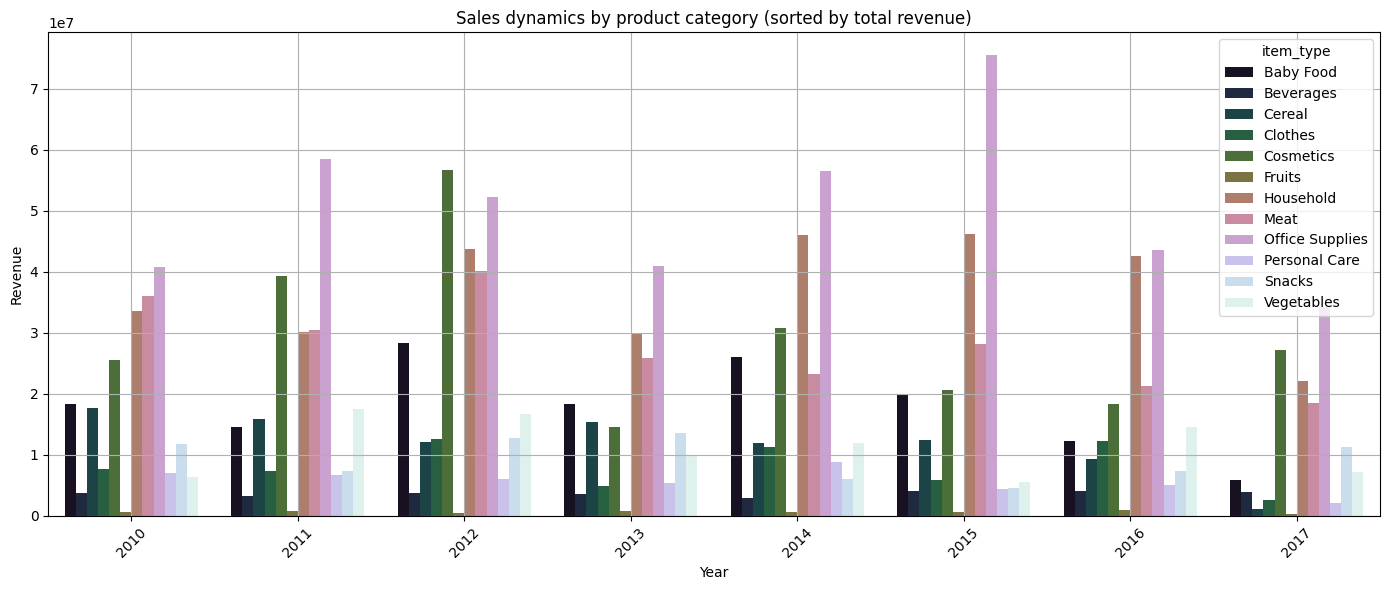

In [ ]:
#3.5 Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів
# add column "year_month"

df_cleaned["year"] = df_cleaned["order_date"].dt.to_period("Y").astype(str)
sales_by_category_year = df_cleaned.groupby(["year", "item_type"])["revenue"].sum().reset_index()

# Сортуємо категорії за totl revenue, для кращого сприйняття
total_revenue_by_category = (
    sales_by_category_year.groupby("item_type")["revenue"].sum().sort_values(ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(data=sales_by_category_year, x='year', y='revenue', hue='item_type', palette="cubehelix")
plt.title("Sales dynamics by product category (sorted by total revenue)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The grouped bar chart "Sales dynamics by product category (sorted by total revenue)" displays the revenue for different product categories across the years 2010 to 2017.

Key observations from the graph:

* "*Office Supplies*" generates the highest revenue across all the years shown.
* "*Household*" is another strong revenue builder.
* Each yeat, the revenue for some product categories fluctuates (for example "*Baby Food*"). This could caused by many factors such as market trends, seasonality, promotions. For example, some categories might show a peak in revenue in a some year.
* "*Beverages*" and "*Fruits*" continue to generate low revenue over time.

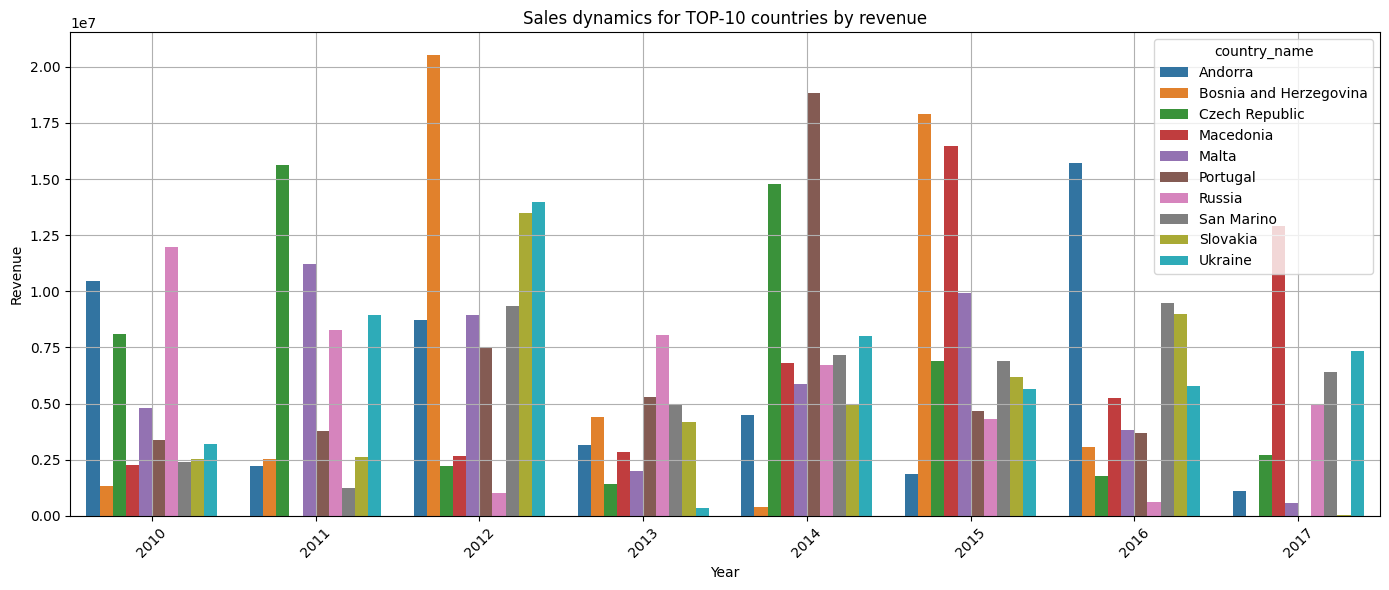

In [ ]:
#3.5 Analyze sales dynamics (over time) by country category with visualization

#select the Top 10 countries for better clarity
top_countries = (df_cleaned.groupby("country_name")["revenue"].sum().sort_values(ascending=False).head(10).index)

filtered_sales = sales_by_country[sales_by_country["country_name"].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.barplot(data=filtered_sales, x='year', y='revenue', hue='country_name')
plt.title("Sales dynamics for TOP-10 countries by revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Bar chart "Sales dynamics for TOP-10 countries by revenue" based on total revenue across the entire period across the years 2010 to 2017.

Key observations from the graph:

* Ukraine and Czech Republic  generate the highest revenue among the top 10 countries throughout the years.
* Some countries show growth or fallen in revenue over the observed period (Andorra, Bosnia and Herzegovina, Portugal etc.). For example, it's good to examining the trends for each country individually to see if their sales are generally increasing, decreasing, or remaining relatively stable.


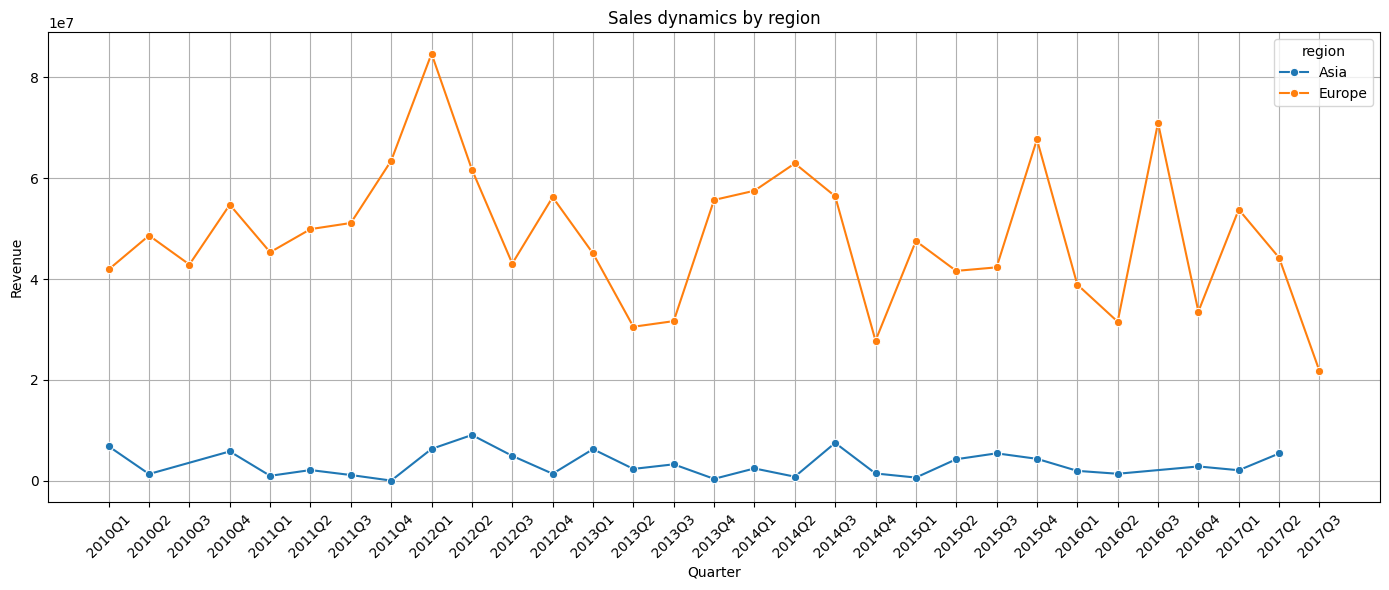

In [ ]:
#3.5 Analyze sales dynamics (over time) by region with visualization
df_cleaned["year_quarter"] = df_cleaned["order_date"].dt.to_period("Q").astype(str)

sales_by_region = df_cleaned.groupby(["year_quarter", "region"])["revenue"].sum().reset_index()
sales_by_category_country_region = df_cleaned.groupby(["year_quarter", "item_type", "country_name", "region"])["revenue"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_region, x="year_quarter", y="revenue", hue="region", marker="o")

plt.title("Sales dynamics by region")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart "Sales dynamics by region" displays the revenue trends for Asia and Europe across different quarters from 2010 Quarter 1 (2010Q1) to 2017 Quarter 3 (2017Q3).

*(q = quarter)*

Key observations from the graph:

* Europe generates higher revenue than Asia throughout the entire period.
* Europe's revenue shows fluctuations throughout the years and quarters. There are clear peaks, indicating strong seasonality or other factors. For example, there are peaks around 2012 Q1, 2014 Q1, and 2016 Q1.
* Asia's revenue remains low and stable compared to Europe. Total revenue generated from Asia is less and haven`t the same peaks as Europe.

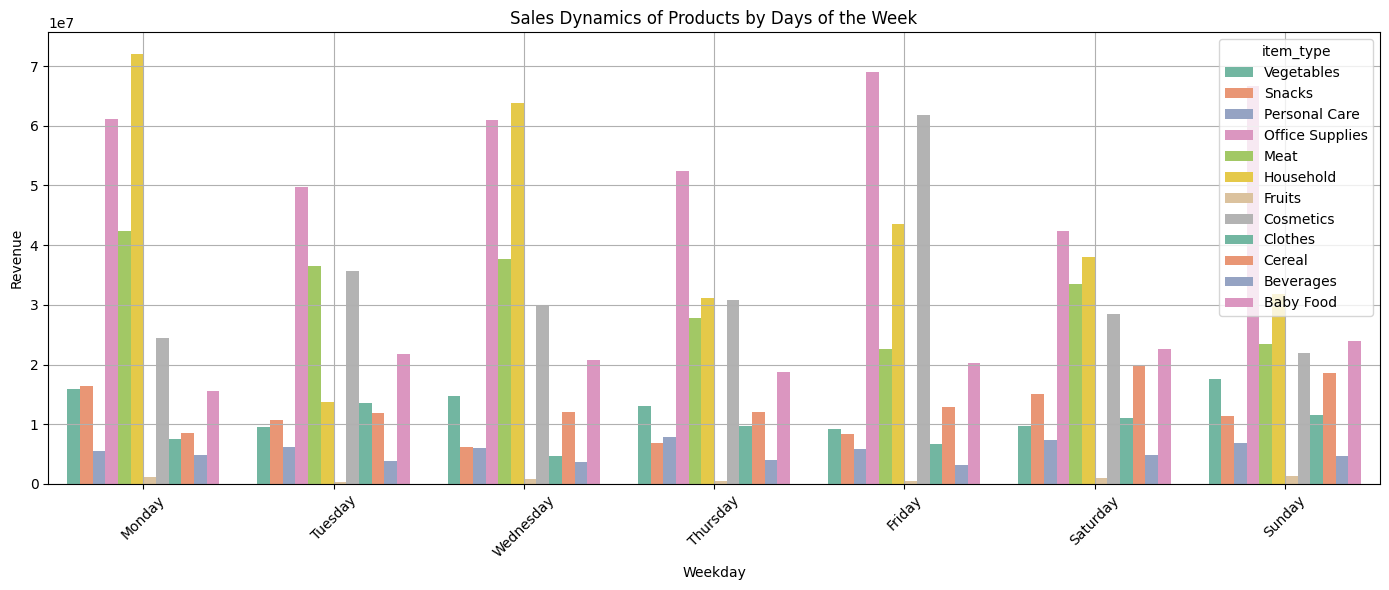

In [ ]:
#3.6 weekly analytics
df_cleaned["day_of_week"] = df_cleaned["order_date"].dt.day_name()
sales_by_day_of_week = df_cleaned.groupby(["day_of_week", "item_type"])["revenue"].sum().reset_index()

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sales_by_day_of_week["day_of_week"] = pd.Categorical(
    sales_by_day_of_week["day_of_week"],
    categories=days_of_week,
    ordered=True
)

sales_by_day_of_week = sales_by_day_of_week.sort_values("day_of_week")

plt.figure(figsize=(14, 6))
sns.barplot(data=sales_by_day_of_week, x="day_of_week", y="revenue", hue="item_type", palette="Set2")
plt.title("Sales Dynamics of Products by Days of the Week")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Bar chart "Sales Dynamics of Products by Days of the Week" displays the revenue for different product categories.

Key observations from the graph:

* "*Office Supplies*" and "*Household*" consistently generate high revenue across all days of the week, with their bars generally being among the tallest for each day.
* "*Cosmetics*" shows the highest revenue on Friday. However, it`s revenue fall down in other days.
* "*Baby Food*" has stable revenue throughout the week.
* "*Snacks*" have little higher sales on Saturday and Sunday.

##Reporting

The analysis of the presented charts reveals various aspects of sales dynamics, profitability, and delivery time across product categories, countries, and regions. There are the key conclusions:

* **Sales and Profitability Leaders**: The "*Office Supplies*" and "*Household*" categories are the most effective in revenue and profit. Among countries, Ukraine and the Czech Republic give the highest sales and profit volumes.
* **Regional Differences**: Europe outperforms Asia in terms of revenue, although Europe show quarterly fluctuations, while the Asian market shows more stable but lower figures.
* **Impact of Unit Quantity on Revenue***: The relationship between the number of units per order and revenue is positive but non-linear, maybe influenced by pricing policies, products, or other factors.
* **Average Profit vs. Delivery Time**: There are no-clear linear relationship between the average profit per order and delivery time. This metrics maybe depends on other factors.
* **Delivery Time**: Average delivery time varies depending on the product category and destination country. In region, Asia has a little longer average delivery time compared to Europe.
* **Sales Dynamics by Day of the Week**: Sales of different product categories show varying dynamics throughout the week. "*Office Supplies*" and "*Household*" have high sales every day.

У датасеті міститься інформація щодо продажів продукції компанії, яка працює на світовому ринку і продає товари у звичайних магазинах та інтернет-магазинах. Датасет складається з трьох таблиць:  
   
 * events.csv — продажі за декілька років;
 * products.csv — категорії товарів та їх коди;
 * countries.csv — країни, регіони та їх коди.  

**Основна мета — очищення даних та проведення їх аналізу; знаходження цінних інсайтів діяльності компанії.**

**Етапи проєкту:**

1. Data overview. Розуміння даних та їх змісту.
- Завантаж датасет, розберись зі змістом колонок, зроби їх опис.
- Вияви ключові поля, що поєднують три таблиці.
2. Data cleaning. Робота із пропущеними даними, некоректними даними, аномаліями.
- Подивись, чи є пропущені значення у кожній таблиці, оціни їх долю, спробуй зрозуміти причини їх виникнення.
- Заповни або видали пропущені значення, обґрунтувавши свою думку.
- Подивись, чи всі типи даних розпізнаються коректно. Якщо є розбіжності, потрібно виявити та усунути причини, за потреби, зробити перетворення типів у колонках.
- Досліди дані на наявність дублікатів. Зверни увагу, що дублікати можуть траплятися через зайві пробіли (або інші символи) у комірках, розбіжність у великих/малих літерах, схожість літер у кирилиці/латиниці тощо. За потреби, зроби перетворення для усунення дублікатів.
- Досліди дані на наявність аномалій. Якщо є, спробуй зрозуміти причини.
3. Data analysis and visualization. Аналіз та візуалізація даних, знаходження цінних інсайтів.
- Проведи з’єднання трьох таблиць в один датафрейм. Видали непотрібні для аналізу колонки. За потреби, зроби перейменування колонок.

- Розпочни з ключових метрик діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо (придумай інші метрики).

- Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі:

 - категорій товарів;
 - географії (країн, регіонів);
 - каналів продажу (онлайн або офлайн).
 - Проаналізуй інтервал часу між замовленням та його відвантаженням та зроби відповідні візуалізації в розрізі:

 - категорій товарів;
 - країн;
 - регіонів.
- Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару. Зроби потрібні для цього агрегування та візуалізації.

- Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визнач основні тенденції.

- Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

💡 Для знаходження дня тижня за датою скористайся методом day_name().

4. Reporting. Склади детальний звіт у файлі Google Colab із кодом, графіками та поясненнями. Зроби висновки з точки зору бізнес-логіки. Цей звіт можна буде використати у резюме як твій реальний кейс проєкту у Data Analytics.